# UK Department for Transport Dataset

## This notebook is a Data Preprocessing and Exploratory Data Analysis on the UK Transport Dataset

## Table of Contents

1. Importing Libraries and Preparing Environment
2. Business Objective
3. Data Preparation
4. Feature Dataset Construction
5. Data Splitting
6. Descriptive Statistics
7. Data Cleaning
8. Statistical Analysis
9. Conclusion
10. Data Exporting

## 1.0 Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings

import io

import time


"""
importing visualization modules

"""

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from scipy import stats
from scipy.stats import chi2_contingency

from scipy.stats import chisquare


import statsmodels.api as sm

import warnings

warnings.filterwarnings("ignore")

### Starting the Notebook Timer

In [2]:
Start_time = time.time()

def notebook_timer(xl):
    
    def wrapper (*args, **kwargs):
        
        start_time = time.time()
        
        result = fn(*args,**kwargs)
        
        end_time = time.time()
        
        time_taken = round(end_time - start_time, 4)
        
        if time_taken < 60:
            
            print(f'{fn.__name__} took {time_taken} seconds to run')

        else :

            print(f'{fn.__name__} took {time_taken/60} minutes to run')

        return result

    return wrapper

## 2.0 Business Objective

### Our business is a consultancy service that focuses on analysing past accident and casualty data to identify the danger zones in a city with regard to vehicular accidents. The goal of this analysis is to come up with preventive measures that can mitigate the loss of human lives and property damage. 


### To provide this service, we analyse reliable and up-to-date data on past accidents and casualties in the city to patterns and trends, such as the locations where accidents are most likely to occur, and the factors that contribute to these accidents.


### Once the danger zones have been identified, we come up with preventive measures and strategies that can help reduce the risk of accidents in these areas.


### Overall, the goal of this consultancy business is to help city authorities and other stakeholders reduce the number of accidents and casualties caused by vehicular accidents in the city.

## 3.0 Data Preparation

### Loading Datasets

In [3]:
"""
Loading Transport Dataset from 1979 - 2021

"""

df_1 = pd.read_csv(r"dft-road-casualty-statistics-accident-1979-2021.csv")


In [4]:
"""
Loading Transport Dataset from 2022

"""

df_2 = pd.read_csv(r"dft-road-casualty-statistics-accident-provisional-mid-year-unvalidated-2022.csv")


### 3.1 Previewing and Validating both Datasets

In [5]:
df_1.head(5)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,197901A11AD14,1979,01A11AD14,NaN,NaN,NaN,NaN,1,3,2,...,-1,1,8,1,-1,0,-1,-1,-1,-1
1,197901A1BAW34,1979,01A1BAW34,198460.0,894000.0,NaN,NaN,1,3,1,...,-1,4,8,3,-1,0,-1,-1,-1,-1
2,197901A1BFD77,1979,01A1BFD77,406380.0,307000.0,NaN,NaN,1,3,2,...,-1,4,8,3,-1,0,-1,-1,-1,-1
3,197901A1BGC20,1979,01A1BGC20,281680.0,440000.0,NaN,NaN,1,3,2,...,-1,4,8,3,-1,0,-1,-1,-1,-1
4,197901A1BGF95,1979,01A1BGF95,153960.0,795000.0,NaN,NaN,1,2,2,...,-1,4,3,3,-1,0,-1,-1,-1,-1


In [6]:
df_1.shape

(8703911, 36)

- The Transport Dataset from 1979 - 2021 has 8,703,911 enteries and 36 columns.

In [7]:
"""
Previewing the Data

"""

df_2.head(5)

,status,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,Unvalidated,2022010369821,2022,010369821,524257.0,172324.0,NaN,NaN,1,3,...,9,1,8,1,0,0,-1,3,-1,E01003464
1,Unvalidated,2022010363954,2022,010363954,539657.0,175987.0,NaN,NaN,1,3,...,1,1,1,1,0,0,-1,3,-1,E01003202
2,Unvalidated,2022070199385,2022,070199385,356998.0,389307.0,NaN,NaN,7,3,...,0,1,1,1,0,0,-1,2,-1,E01012567
3,Unvalidated,2022070212652,2022,070212652,366237.0,387487.0,NaN,NaN,7,2,...,0,4,1,1,0,0,-1,1,-1,E01012515
4,Unvalidated,2022010363966,2022,010363966,536133.0,173292.0,NaN,NaN,1,3,...,4,1,1,1,0,0,-1,1,-1,E01003316


In [8]:
df_2.shape

(48283, 37)

- The Transport Dataset for 2022 has 48283 enteries and 37 columns.

### 3.2 Merging both Datasets

In [9]:
df = pd.concat([df_1, df_2])

### 3.2.1 Validating the Merged Dataset

In [10]:
# Fully view all the columns in the Dataset

pd.set_option('display.max_columns', None)

In [11]:
df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,status
0,197901A11AD14,1979,01A11AD14,NaN,NaN,NaN,NaN,1,3,2,1,18/01/1979,5,08:00,11,-1,-1,3,4,1,30.0,1,4,-1,-1,-1,-1,1,8,1,-1,0,-1,-1,-1,-1,NaN
1,197901A1BAW34,1979,01A1BAW34,198460.0,894000.0,NaN,NaN,1,3,1,1,01/01/1979,2,01:00,23,-1,-1,6,0,9,30.0,3,4,-1,-1,-1,-1,4,8,3,-1,0,-1,-1,-1,-1,NaN
2,197901A1BFD77,1979,01A1BFD77,406380.0,307000.0,NaN,NaN,1,3,2,3,01/01/1979,2,01:25,17,-1,-1,3,112,9,30.0,6,4,-1,-1,-1,-1,4,8,3,-1,0,-1,-1,-1,-1,NaN
3,197901A1BGC20,1979,01A1BGC20,281680.0,440000.0,NaN,NaN,1,3,2,2,01/01/1979,2,01:30,2,-1,-1,3,502,12,30.0,3,2,-1,-1,-1,-1,4,8,3,-1,0,-1,-1,-1,-1,NaN
4,197901A1BGF95,1979,01A1BGF95,153960.0,795000.0,NaN,NaN,1,2,2,1,01/01/1979,2,01:30,510,-1,-1,3,309,6,30.0,0,-1,-1,-1,-1,-1,4,3,3,-1,0,-1,-1,-1,-1,NaN


In [12]:
df.shape

(8752194, 37)

- The combined Transport Dataset has 8,752,194 enteries and 37 columns.

### 3.3 A lot of data from earlier years in the dataset are missing so the dataset will be filtered to only include data from the year 2000 to 2021

In [13]:
"""
Filter the data to include data from the year 2000 onwards.

"""

df = df[df.accident_year >= 2000]


In [14]:
df.shape

(3633930, 37)

- The current filtered dataset contains 3,630,583 entries and 37 columns.

### 3.4 Our analysis will be focused on data from the Liverpool region. This will be filtered using the "Local Authority District" variable.

In [15]:
"""
Filter the data to include data with Local Authority District from Liverpool

"""

df = df[df.local_authority_district == 91]


In [16]:
df.shape

(31484, 37)

- The current filtered dataset contains 31,483 entries and 37 columns.

### 3.2.6 Further filtering the dataset by narrowing our analysis to data from the year 2010.

In [17]:
"""
Filter the data to select only data between 2010 and 2020

"""

df = df[df.accident_year >= 2010]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11820 entries, 7159107 to 8537356
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               11820 non-null  object 
 1   accident_year                                11820 non-null  int64  
 2   accident_reference                           11820 non-null  object 
 3   location_easting_osgr                        11819 non-null  float64
 4   location_northing_osgr                       11819 non-null  float64
 5   longitude                                    11819 non-null  float64
 6   latitude                                     11819 non-null  float64
 7   police_force                                 11820 non-null  int64  
 8   accident_severity                            11820 non-null  int64  
 9   number_of_vehicles                           11820 non-null  int

In [19]:
df.shape

(11820, 37)

- The current filtered dataset contains 11,819 entries and 37 columns.

## 4.0 Feature Dataset Construction

### Creating a new column which is the time variable converted to numeric decimals

In [20]:
"""
Creating a new column which is the time variable converted 

to numeric decimals after which a histogram can be used to 

check the distribution in the dataset

"""

from datetime import datetime

def time_to_fraction(time_str):
    time_obj = datetime.strptime(time_str, '%H:%M')
    numeric_fraction = time_obj.hour + time_obj.minute/60.0
    return numeric_fraction

# Apply conversion function to column

df['numeric_fraction'] = df['time'].apply(lambda x: time_to_fraction(x))

df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,status,numeric_fraction
7159107,201005BB04137,2010,05BB04137,334680.0,393270.0,-2.984644,53.432141,5,2,1,1,06/07/2010,3,11:44,91,E08000012,E08000012,3,567,6,30.0,3,4,6,0,0,4,1,1,1,0,0,1,1,2,E01006778,NaN,11.733333
7159174,201005BB04805,2010,05BB04805,341910.0,383930.0,-2.874114,53.349043,5,3,2,3,17/08/2010,3,15:20,91,E08000012,E08000012,3,561,1,30.0,1,4,6,0,0,0,1,1,1,0,0,1,2,2,E01006743,NaN,15.333333
7159401,201005CC01265,2010,05CC01265,340710.0,396610.0,-2.894526,53.462873,5,3,1,2,20/01/2010,4,19:55,91,E08000012,E08000012,3,580,6,40.0,0,-1,-1,-1,0,0,5,1,1,4,2,2,1,2,E01006661,NaN,19.916667
7159447,201005CC02296,2010,05CC02296,340970.0,390260.0,-2.889417,53.405831,5,3,2,1,21/03/2010,1,17:52,91,E08000012,E08000012,3,5080,6,30.0,3,4,6,0,0,0,1,1,1,0,0,1,1,2,E01006773,NaN,17.866667
7159455,201005CC02488,2010,05CC02488,341000.0,390300.0,-2.888974,53.406194,5,3,2,2,01/04/2010,5,13:15,91,E08000012,E08000012,1,62,3,50.0,0,-1,-1,-1,0,0,1,1,1,0,0,1,1,2,E01006584,NaN,13.250000


### Creating a Month Column

In [21]:
df['Month'] = df['date'].str.split('/').str[1]
df['Month'] = df['Month'].astype('int')

## 5.0 Data Splitting into Training and Test Data

In [22]:
# splitting dataset in X and y to be used in model building

X = df.drop("accident_severity", axis=1)  # Features

y = df["accident_severity"]  # Labels (Target Variable)

In [23]:
# split the dataset in a 70% train - 30%  test split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)


In [24]:
#shape of the 4 dataframes
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8274, 38)
(3546, 38)
(8274,)
(3546,)


- The x_train dataset is 8,271 rows and 38 columns


- the x_test dataset is 3,546 rows and 38 columns

## 6.0 Descriptive Statistics on the Training Data

In [25]:
# convert numerical variables to categorical variables

cols_to_change = ['police_force', 'local_authority_district','first_road_class', 'first_road_number', 'road_type',
       'junction_detail','pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag']

for col in cols_to_change:
    x_train[col] = x_train[col].astype('category')
    x_test[col] = x_test[col].astype('category')

In [26]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [27]:
y_train['accident_severity'] = y_train['accident_severity'].astype('category')
y_test['accident_severity'] = y_test['accident_severity'].astype('category')

### Histogram and Bar Chart Functions

In [28]:
# Histogram and Bar Chart Functions

"""
This function plots a histogram and also shows the mean and median on the graph

"""


def hist(dataset, column, figsize=(15, 9), kde=True, bins=None):
    
    
    f2, (ax_hist2) = plt.subplots(
        nrows=1, 
        sharex=True,
        figsize=figsize
    ) 
    sns.histplot(
        data=dataset, x=column, kde=kde, ax=ax_hist2,bins=bins
    ) if bins else sns.histplot(
        data=dataset, x=column, kde=kde, ax=ax_hist2
    ) 
    ax_hist2.axvline(
        dataset[column].mean(), color="red", linestyle="--"
    )  
    ax_hist2.axvline(
        dataset[column].median(), color="purple", linestyle="-"
    )  
    
    
# Barchart Function

"""
This function plots a barchart 

"""


def new_barchart(dataframe,col_name,y_label,x_label,x_tick_label,rot,perc=False):

    """
    Plot the frequencies of the 'Private' categorical variable

    """
    plt.figure(figsize=(15, 9))
    
    plt.xticks(rotation=rot, fontsize=15)
    
    total = len(dataframe[col_name]) 

    ax = sns.countplot(
            data=dataframe,
            x=col_name,
            palette="Paired"
        )

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')

    ax.tick_params(bottom=False, left=False)

    ax.set_axisbelow(True)

    ax.yaxis.grid(True, color='#EEEEEE')

    ax.xaxis.grid(False)


    ax.set_ylabel(y_label,fontsize=20)
    ax.set_xlabel(x_label,fontsize=20)
    
    ax.set_xticklabels(x_tick_label,fontsize=20)

    #ax.set_ylim(0,600)
    
    plt.ticklabel_format(style='plain', axis='y')
    
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
            
            if (100 * p.get_height() / total) > 0.5:
        
                x = p.get_x() + p.get_width() / 2  # width of the plot
                y = p.get_height()  # height of the plot

                ax.annotate(
                    label,
                    (x, y),
                    ha="center",
                    va="center",
                    size=12,
                    xytext=(0, 5),
                    textcoords="offset points",
                )  # annotate the percentage
                
            else:
                pass
        
        else:
            pass
            #label = p.get_height()  # count of each level of the category




    plt.show()  # show the plot

    
    
# Barchart Function

"""
This function plots a barchart 

"""

def barchart(dataframe,col_name,y_label,x_label,perc=False):

    """
    Plot the frequencies of the 'Private' categorical variable

    """
    plt.figure(figsize=(15, 9))
    
    total = len(dataframe[col_name]) 
    

    ax = sns.countplot(
            data=dataframe,
            x=col_name,
            palette="Paired"
        )

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')

    ax.tick_params(bottom=False, left=False)

    ax.set_axisbelow(True)

    ax.yaxis.grid(True, color='#EEEEEE')

    ax.xaxis.grid(False)


    ax.set_ylabel(y_label,fontsize=20)
    ax.set_xlabel(x_label,fontsize=20)
    
    #ax.set_ylim(0,600)
    
    plt.ticklabel_format(style='plain', axis='y')
    
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
            
            if (100 * p.get_height() / total) > 0.5:
        
                x = p.get_x() + p.get_width() / 2  # width of the plot
                y = p.get_height()  # height of the plot

                ax.annotate(
                    label,
                    (x, y),
                    ha="center",
                    va="center",
                    size=12,
                    xytext=(0, 5),
                    textcoords="offset points",
                )  # annotate the percentage
                
            else:
                pass
        
        else:
            pass
            #label = p.get_height()  # count of each level of the category



    plt.show()  # show the plot
    
    

    
# Histogram Function of Time

"""
This function plots a histogram of the time an accident occurs

on a scale from 0 to 24 similar to a clock and the hours in a day

and also shows the mean and median on the graph

"""


def hist_time(dataset, column, figsize=(20, 12), kde=True, bins=None):
    
    
    f2, (ax_hist2) = plt.subplots(
        nrows=1, 
        sharex=True,
        figsize=figsize
    ) 
    sns.histplot(
        data=dataset, x=column, kde=kde, ax=ax_hist2,bins=bins
    ) if bins else sns.histplot(
        data=dataset, x=column, kde=kde, ax=ax_hist2
    ) 
    ax_hist2.axvline(
        dataset[column].mean(), color="red", linestyle="--"
    )  
    ax_hist2.axvline(
        dataset[column].median(), color="purple", linestyle="-"
    )  
    
    ax_hist2.set_xlim(0, 24)
    ax_hist2.set_xticks(range(0, 25))
    ax_hist2.set_xlabel('Time')
    


### 6.1.1 Descriptive statistics for Accident Year

In [29]:
pd.DataFrame(x_train.loc[:,'accident_year'].value_counts())

,accident_year
2010,938
2012,901
2014,885
2011,850
2015,794
2013,748
2016,746
2017,649
2018,646
2019,621


In [30]:
pd.DataFrame(x_train.loc[:,'accident_year'].describe())

,accident_year
count,8274.000000
mean,2014.489002
std,3.077772
min,2010.000000
25%,2012.000000
50%,2014.000000
75%,2017.000000
max,2020.000000


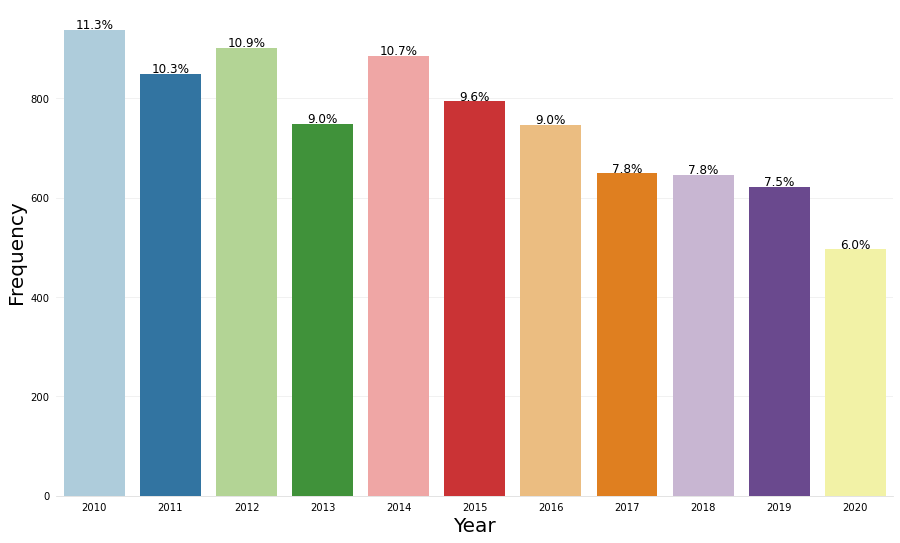

In [31]:
barchart(x_train,'accident_year','Frequency','Year',perc=True)

- The number of accidents yearly show a slight downward trend, with accidents peaking in 2010 with 11.3% of all accidents occuring in that year.


- The accident count roughly stays the same from 2017 - 2019. 


- The accident count for 2020 is significantly lower than the rest. The significantly lower accident count of 2020 may also be due to the rise of the COVID pandemic which reduced the number and density of vehicles on roads.

### 6.1.2 Descriptive statistics for Accident Severity

In [32]:
y_train.head()

,accident_severity
7751693,3
7315071,3
8424567,3
8536985,3
8424042,3


In [33]:
y_train.value_counts()

accident_severity
3                    6752
2                    1454
1                      68
dtype: int64

In [34]:
pd.DataFrame(y_train.describe())

,accident_severity
count,8274
unique,3
top,3
freq,6752


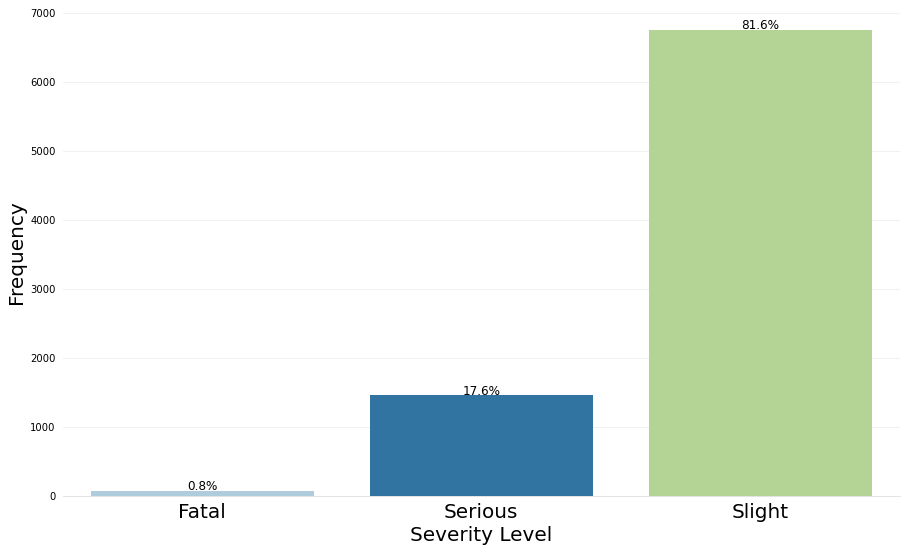

In [35]:
new_barchart(y_train,'accident_severity','Frequency','Severity Level',['Fatal','Serious','Slight'],0,perc=True)

- 81.6% of accidents result in slight injuries, while 17.6% results in serious injuries, and 0.8% results in fatal injuries.


- Comprising 18.4% of all accidents, reducing the occurence of serious and fatal injuries in accidents is a priority.


- Slight injuries are the most frequent kind of injuries in the dataset.

### 6.1.3 Descriptive statistics for Number of Vehicles

In [36]:
x_train['number_of_vehicles'].value_counts()

2     4919
1     2650
3      563
4      107
5       24
6        7
8        1
11       1
12       1
7        1
Name: number_of_vehicles, dtype: int64

In [37]:
pd.DataFrame(x_train.loc[:,'number_of_vehicles'].describe())

,number_of_vehicles
count,8274.000000
mean,1.789340
std,0.681632
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,12.000000


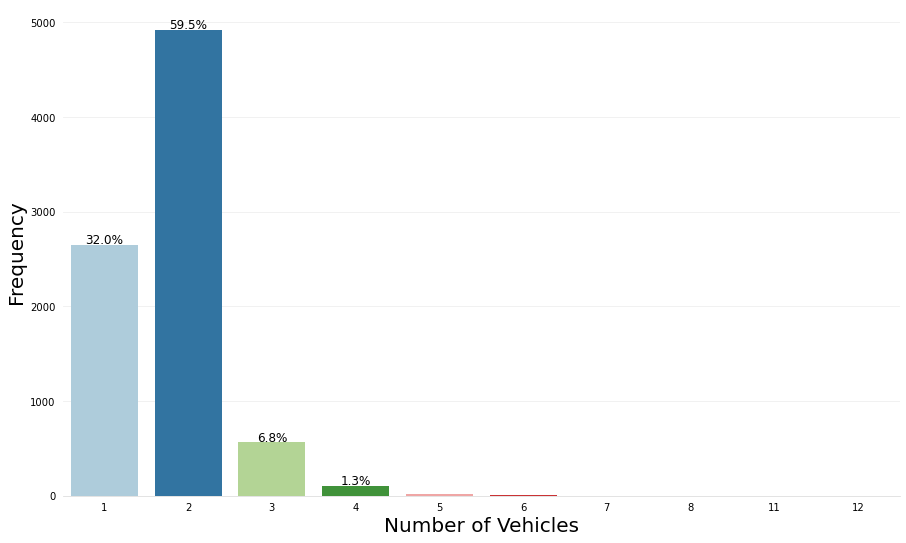

In [38]:
barchart(x_train,'number_of_vehicles','Frequency','Number of Vehicles',perc=True)

- 59.5% of all accidents involve 2 vehicles, 32% involve a single vehicle, 6.8% involve 3 vehicles, and 1.3% involve 4 vehicles. The rest are negligible.


- Statistical Analysis will be carried out to check the correlation between vehicles involved in an accident and the severity level of the accident.


- The median of veicles involved in any particular accident is 2, while the mean is 1.7893

### 6.1.4 Descriptive statistics for Number of Casualties

In [39]:
x_train['number_of_casualties'].value_counts()

1     6240
2     1259
3      424
4      210
5       75
6       32
7       13
9        9
8        5
10       2
14       2
11       1
12       1
13       1
Name: number_of_casualties, dtype: int64

In [40]:
pd.DataFrame(x_train.loc[:,'number_of_casualties'].describe())

,number_of_casualties
count,8274.000000
mean,1.418057
std,0.955491
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,14.000000


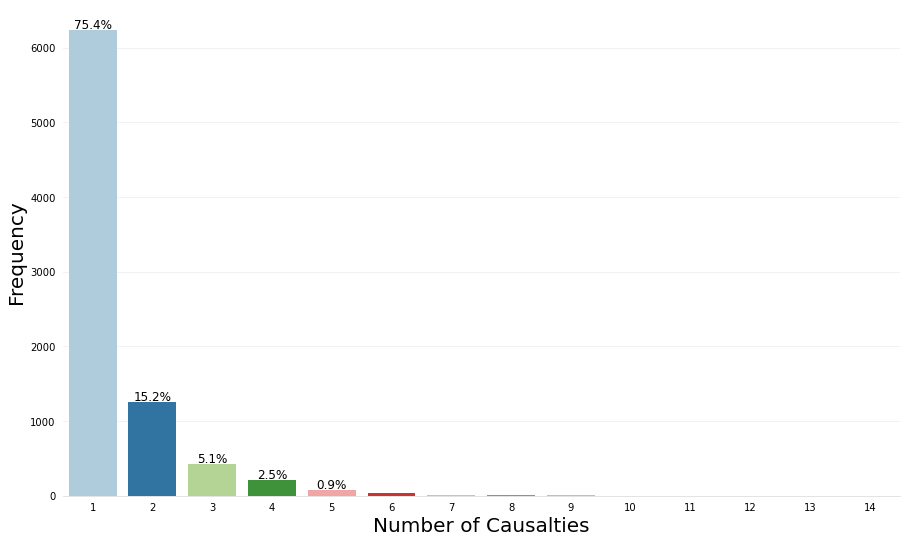

In [41]:
barchart(x_train,'number_of_casualties','Frequency','Number of Causalties',perc=True)

- Most accidents overwhelmingly have 1 casualty with 75.4% of all accidents having 1 casualty. 15.2% of accidents have 2 casualties, while 5.1% of accidents have 3 accidents. The remaining 3.3% of accidents account for accidents with 4 or more casualties.


- The mean number of casualties in any particular accident is 1.4180, while the median is 1.

### 6.1.5 Descriptive statistics for Day of the Week

In [42]:
x_train['day_of_week'] = x_train['day_of_week'].astype('category')

In [43]:
x_train['day_of_week'].value_counts()

6    1392
4    1269
5    1256
3    1234
2    1146
7    1074
1     903
Name: day_of_week, dtype: int64

In [44]:
pd.DataFrame(x_train.loc[:,'day_of_week'].describe())

,day_of_week
count,8274
unique,7
top,6
freq,1392


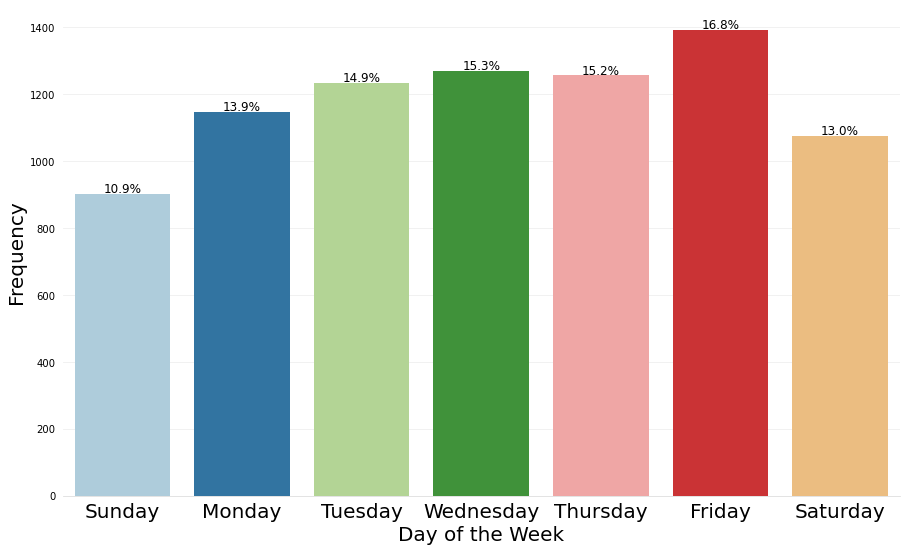

In [45]:
week_list = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

new_barchart(x_train,'day_of_week','Frequency','Day of the Week',week_list,0,perc=True)

- Sunday is the day with the least amount of accidents with 10.9%, with Friday accounting for most accidents with 16.8%. The remaining days account for between 13.0% to 15.3% of accidents each.


- Statistical analysis should be run on whether the day of the week corresponds to the frequency of accidents on that day.

### 6.1.6 Descriptive statistics for Time

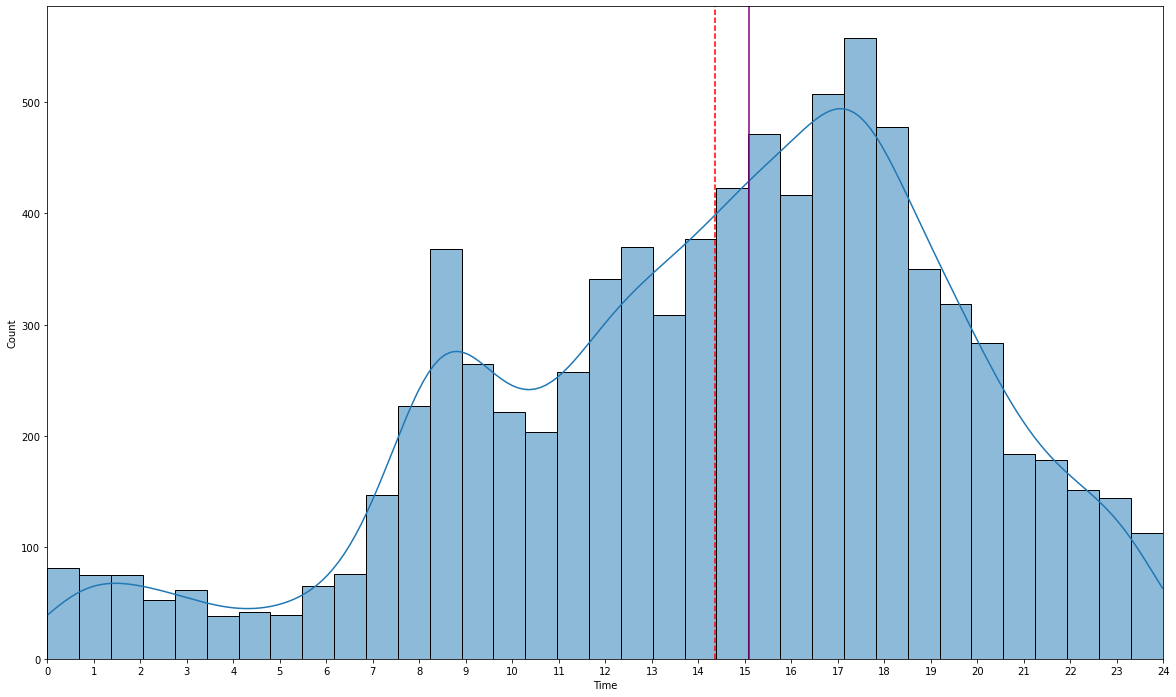

In [46]:
hist_time(x_train,'numeric_fraction')

- The distribution for the time an accident occurs has 1 distinct peak. 


- From the graph this peaks is around 5:30pm.


- It should be noted the hour with the most accident occurence is between 4:30pm and 5:30pm.


- Additionally it should be noted that most accidents occur between 8:00am and 7:00pm before declining sharply.


- The mean time of an accident is ~2:21pm with the median of all accidents being at 3:05pm 

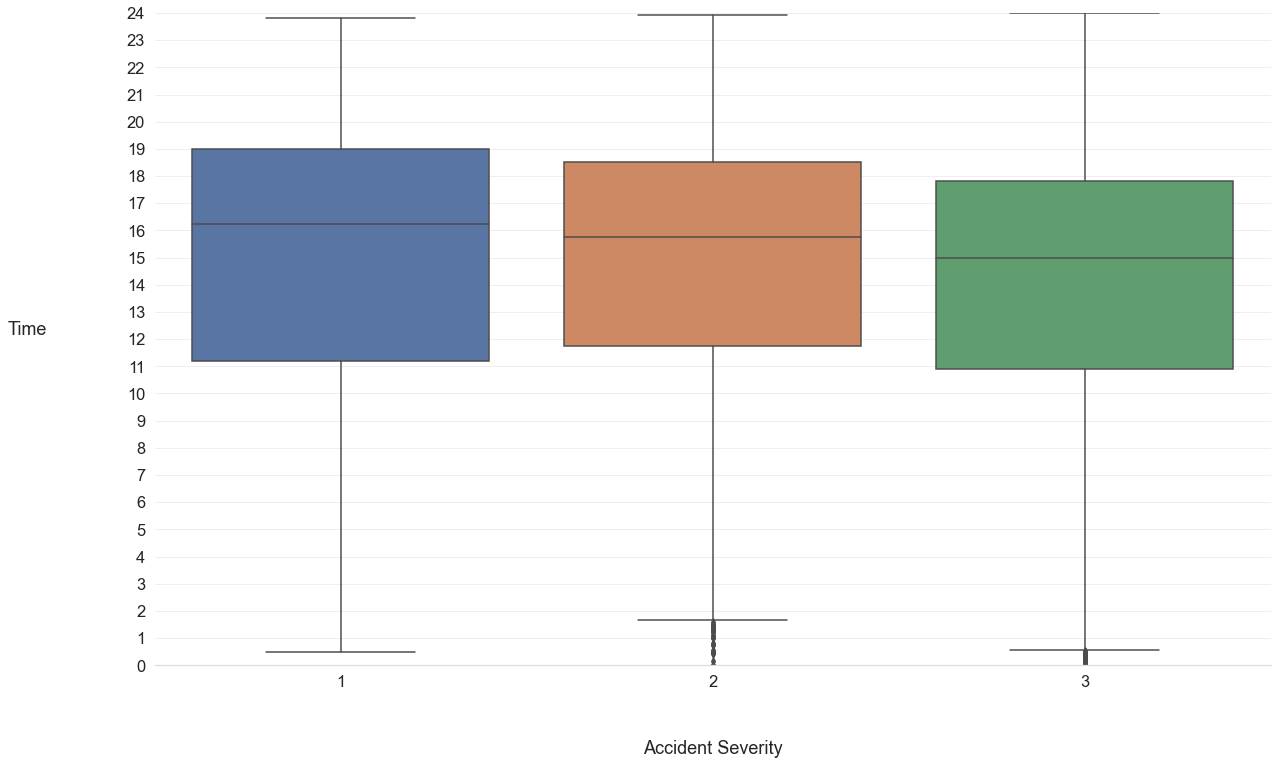

In [47]:
"""

Using a box plot to show the relationship between accident time and accident severity

"""


plt.figure(figsize=(20, 12))


sns.set(font_scale=1.5,rc={'axes.facecolor':'w'})

ax = sns.boxplot(data = x_train,y='numeric_fraction',x= y_train['accident_severity'])

ax.spines['top'].set_visible(False)
    
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')


ax.tick_params(bottom=False, left=False)


ax.set_axisbelow(True)

ax.yaxis.grid(True, color='#EEEEEE')

ax.xaxis.grid(False)

ax.set_ylim(0, 24)

ax.set_yticks(range(0, 25))

ax.set_ylabel('Time', rotation=0, labelpad=100)

ax.set_xlabel('Accident Severity', rotation=0, labelpad=50)


plt.show()

- From the boxplot, the mean time of accidents is slightly higher but roughly the same for serious to fatal accidents.


- Statistical analysis will be carried out to check for correlation between the two variables.

### 6.1.7 Descriptive Statistics for Month

In [48]:
x_train['Month'].value_counts()

11    809
10    771
7     731
12    716
9     705
5     683
3     675
6     657
1     653
2     649
4     620
8     605
Name: Month, dtype: int64

In [49]:
pd.DataFrame(x_train.loc[:,'Month'].describe())

,Month
count,8274.000000
mean,6.685521
std,3.474827
min,1.000000
25%,4.000000
50%,7.000000
75%,10.000000
max,12.000000


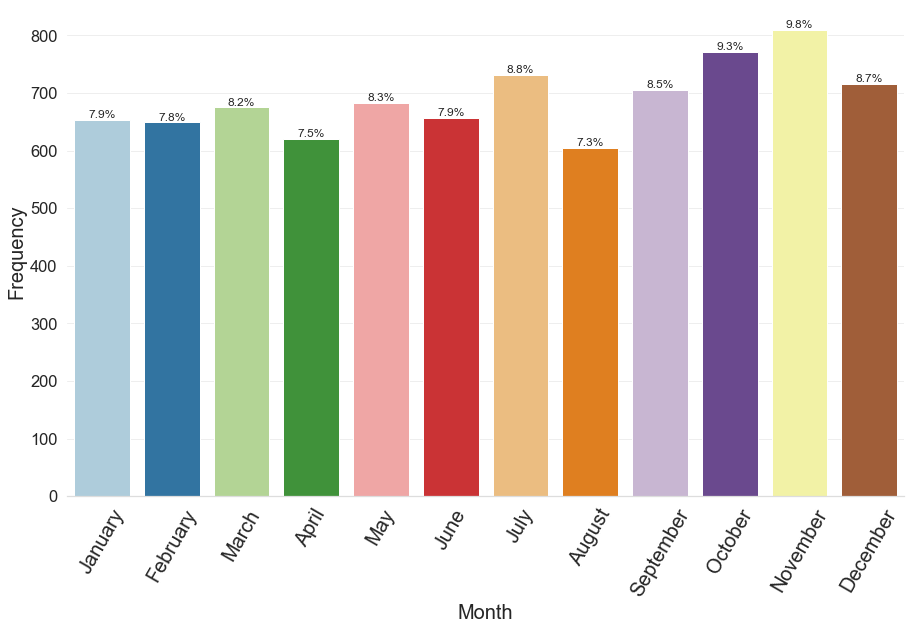

In [50]:
month_list = ['January','February','March','April','May','June','July','August','September','October','November','December']

new_barchart(x_train,'Month','Frequency','Month',month_list,60,perc=True)

- November, December, and October are the months with the most occurences of accidents.


- April, February and August are the months with the least occurences of accidents.

In [51]:
x_train['Month'] = x_train['Month'].astype('category')

x_test['Month'] = x_test['Month'].astype('category')

### 6.1.8 Descriptive statistics for First Road Class

In [52]:
x_train['first_road_class'].value_counts()

6    3944
3    3455
4     810
5      53
1      12
Name: first_road_class, dtype: int64

In [53]:
pd.DataFrame(x_train.loc[:,'first_road_class'].describe())

,first_road_class
count,8274
unique,5
top,6
freq,3944


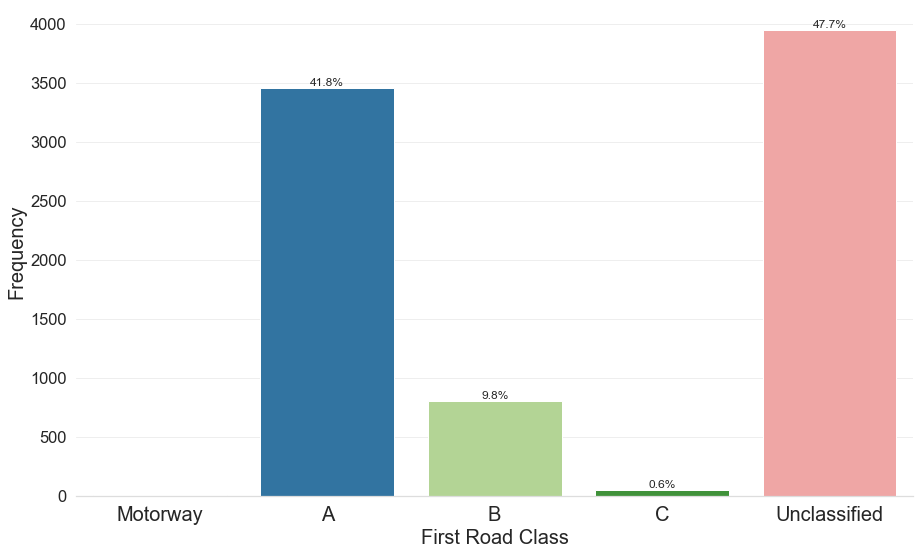

In [54]:
first_road_list = ['Motorway','A','B','C','Unclassified']

new_barchart(x_train,'first_road_class','Frequency','First Road Class',first_road_list,0,perc=True)

- 41.8% of all accidents take place on "A" Roads which is a significant amount. 


- 9.8% take place on "B" Roads while 0.6% take place on "C" roads.


- 47.7% of accidents take place on Unclassified roads which is a significant proportion. Further investigation should be done to either classify these roads, or drop the column altogether.

### 6.1.9 Descriptive statistics for First Road Number

In [55]:
x_train['first_road_number'].value_counts()

0       3997
580      426
57       381
562      376
59       357
        ... 
58         1
5201       1
5318       1
2          1
5399       1
Name: first_road_number, Length: 61, dtype: int64

In [56]:
pd.DataFrame(x_train.loc[:,'first_road_number'].describe())

,first_road_number
count,8274
unique,61
top,0
freq,3997


- After looking into this categorical variable, no obvious ways to perform descriptive statistics on the variable occurs to me at this moment.


### 6.1.10 Descriptive statistics for Road Type

In [57]:
x_train['road_type'].value_counts()

6    5425
3    2398
2     251
1     160
7      21
9      19
Name: road_type, dtype: int64

In [58]:
pd.DataFrame(x_train.loc[:,'road_type'].describe())

,road_type
count,8274
unique,6
top,6
freq,5425


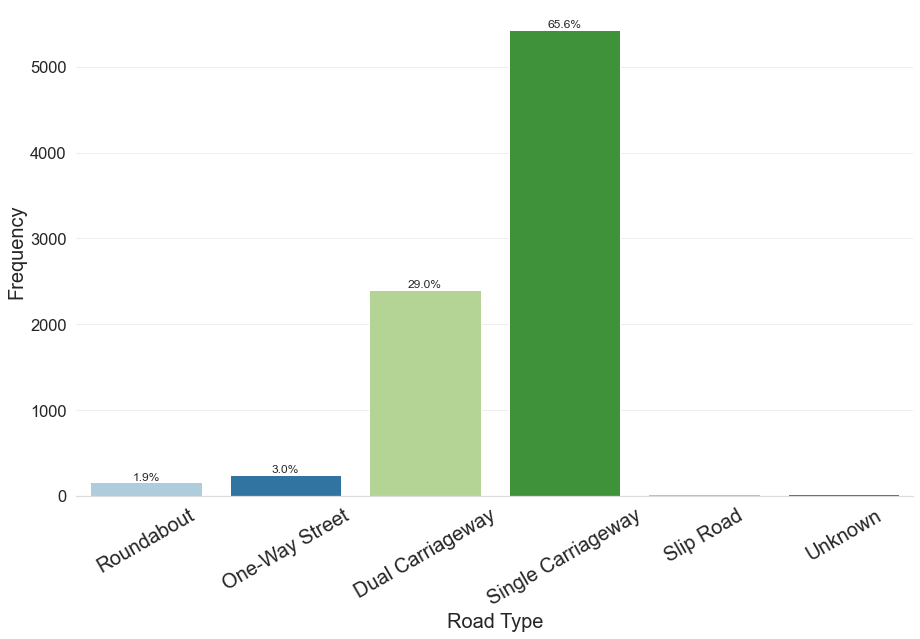

In [59]:
road_type_list = ['Roundabout','One-Way Street','Dual Carriageway','Single Carriageway','Slip Road','Unknown']

new_barchart(x_train,'road_type','Frequency','Road Type',road_type_list,30,perc=True)

- Most accidents happen on Single Carriageway Roads with 65.6%


- 29.0% of accidents happen on Dual Carriageway Roads while 3.0% of all accidents happen on One-Way Streets.


- Statistical analysis should be carried out on whether Road Type affects accident severity or frequency.

### 6.1.11 Descriptive statistics for Speed Limit

In [60]:
x_train['speed_limit'].value_counts()

 30.0    6876
 40.0     853
 20.0     516
 50.0      13
 70.0      12
 60.0       3
-1.0        1
Name: speed_limit, dtype: int64

In [61]:
pd.DataFrame(x_train.loc[:,'speed_limit'].describe())

,speed_limit
count,8274.000000
mean,30.503868
std,4.436865
min,-1.000000
25%,30.000000
50%,30.000000
75%,30.000000
max,70.000000


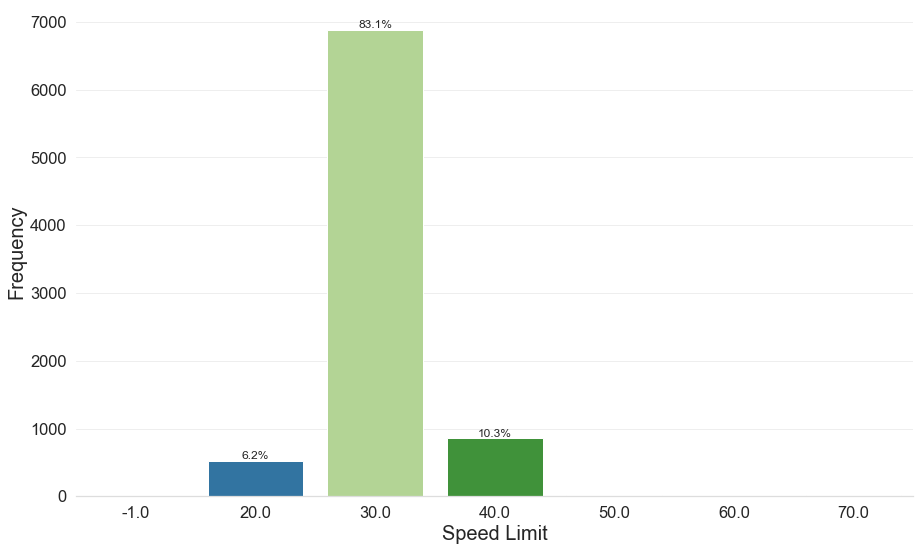

In [62]:
barchart(x_train,'speed_limit','Frequency','Speed Limit',perc=True)

- 83.1% of accidents occur where the speed limit is 30. This is a significant amount and should be investigated.


- 10.3% occur where the speed limit is 40 while 6.2% of accidents happen where the speed limit is 20.


- There seems to be no trend of higher speed limits resulting in higher accidents.


- The mean speed limit in accidents is 30.50, while the median is 30.0

### 6.1.12 Descriptive statistics for Junction Detail

In [63]:
x_train['junction_detail'].value_counts()

3     2788
0     2531
6     1686
9      454
7      388
1      285
5       62
8       52
2       14
99      14
Name: junction_detail, dtype: int64

In [64]:
pd.DataFrame(x_train.loc[:,'junction_detail'].describe())

,junction_detail
count,8274
unique,10
top,3
freq,2788


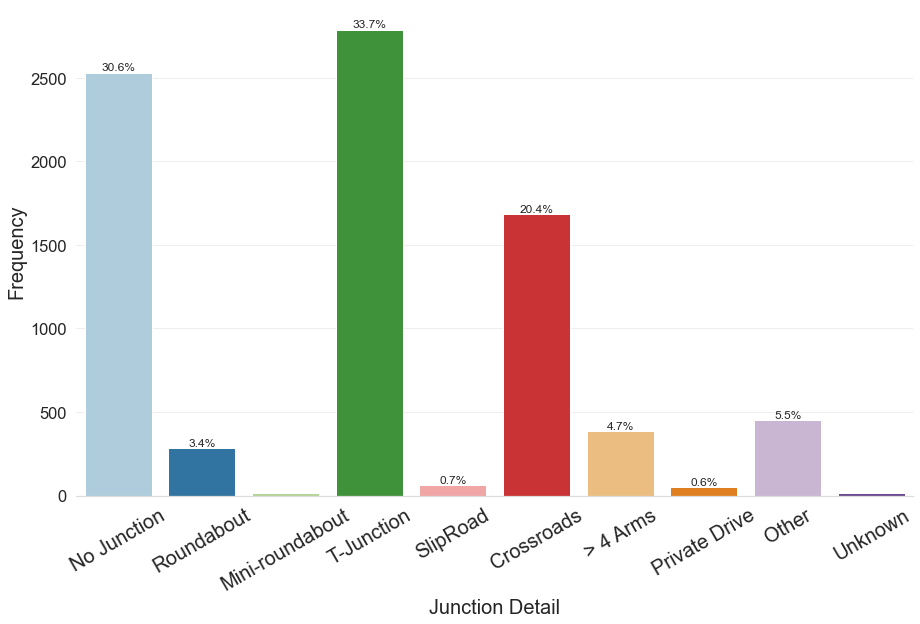

In [65]:
junction_detail_list = ['No Junction','Roundabout','Mini-roundabout','T-Junction','SlipRoad','Crossroads','> 4 Arms','Private Drive','Other','Unknown']

new_barchart(x_train,'junction_detail','Frequency','Junction Detail',junction_detail_list,30,perc=True)

- 30.6% of all accidents happen where there aren't junctions with 2788 occurences.


- 33.7% happen at T-Junctions, 20.4% happen at Crossroads, and 3.4% of accidents happen at Roundabouts.


- The remaining junction details account for a combined 11.9% of accidents.

### 6.1.13 Descriptive statistics for Pedestrian Crossing Human Control

In [66]:
x_train['pedestrian_crossing_human_control'].value_counts()

0    8160
2      77
1      20
9      17
Name: pedestrian_crossing_human_control, dtype: int64

In [67]:
pd.DataFrame(x_train.loc[:,'pedestrian_crossing_human_control'].describe())

,pedestrian_crossing_human_control
count,8274
unique,4
top,0
freq,8160


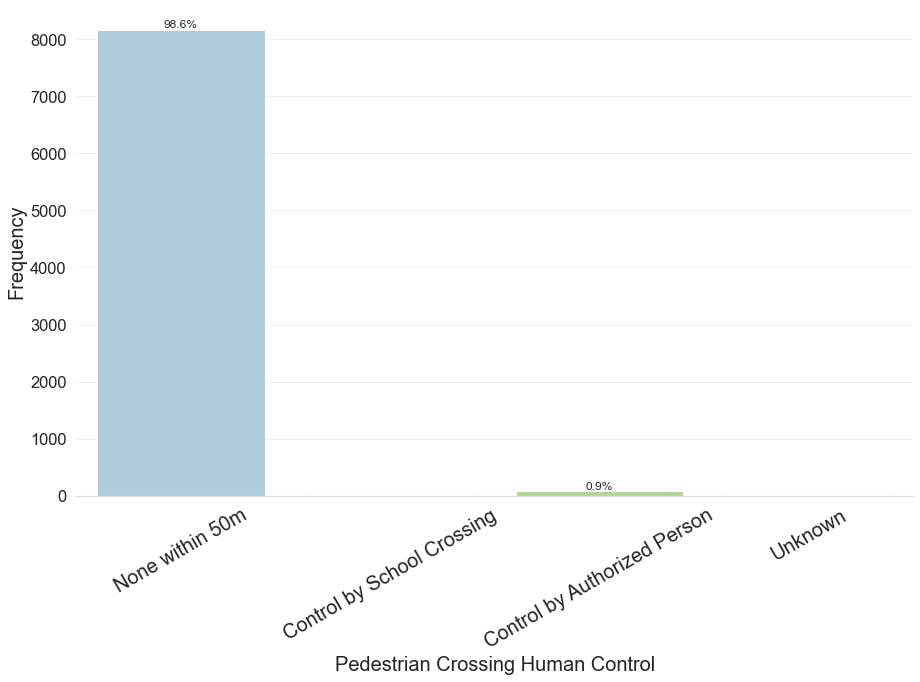

In [68]:
pedestrian_crossing_human_control_list = ['None within 50m','Control by School Crossing','Control by Authorized Person','Unknown']

new_barchart(x_train,'pedestrian_crossing_human_control','Frequency','Pedestrian Crossing Human Control',pedestrian_crossing_human_control_list,30,perc=True)

- 98.6% of all accidents happen where there isn't a pedestrian crossing human control within 50m with 8160 occurences.


- This is a huge margin. From the data, there should be more Pedestrian Crossings controlled by Humans on roads to limit accidents.

### 6.1.14 Descriptive statistics for Pedestrian Crossing Physical Facilities

In [69]:
x_train['pedestrian_crossing_physical_facilities'].value_counts()

0    6093
5    1099
4     784
1     145
8     128
9      17
7       8
Name: pedestrian_crossing_physical_facilities, dtype: int64

In [70]:
pd.DataFrame(x_train.loc[:,'pedestrian_crossing_physical_facilities'].describe())

,pedestrian_crossing_physical_facilities
count,8274
unique,7
top,0
freq,6093


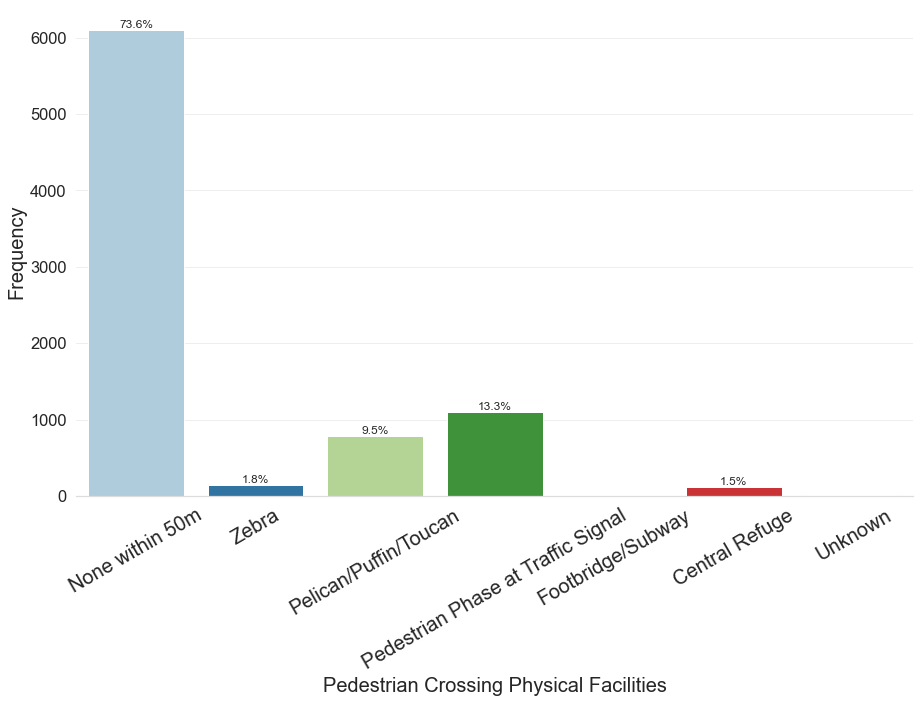

In [71]:
pedestrian_crossing_physical_facilities_list = ['None within 50m','Zebra','Pelican/Puffin/Toucan','Pedestrian Phase at Traffic Signal','Footbridge/Subway','Central Refuge','Unknown']

new_barchart(x_train,'pedestrian_crossing_physical_facilities','Frequency','Pedestrian Crossing Physical Facilities',pedestrian_crossing_physical_facilities_list,30,perc=True)

- 73.6% of accidents occur when there are no physical pedestrian crossing facilities within 50m of the accident site with 6093 occurences.


- 13.3% of accidents happen at the pedestrian phase at a traffic signal, 9.5% off accidents happen at Pelican, while 1.8% of accidents happen at Zebra crossings.

### 6.1.15 Descriptive statistics for Light Conditions

In [72]:
x_train['light_conditions'].value_counts()

1    5922
4    2189
7      76
5      59
6      28
Name: light_conditions, dtype: int64

In [73]:
pd.DataFrame(x_train.loc[:,'light_conditions'].describe())

,light_conditions
count,8274
unique,5
top,1
freq,5922


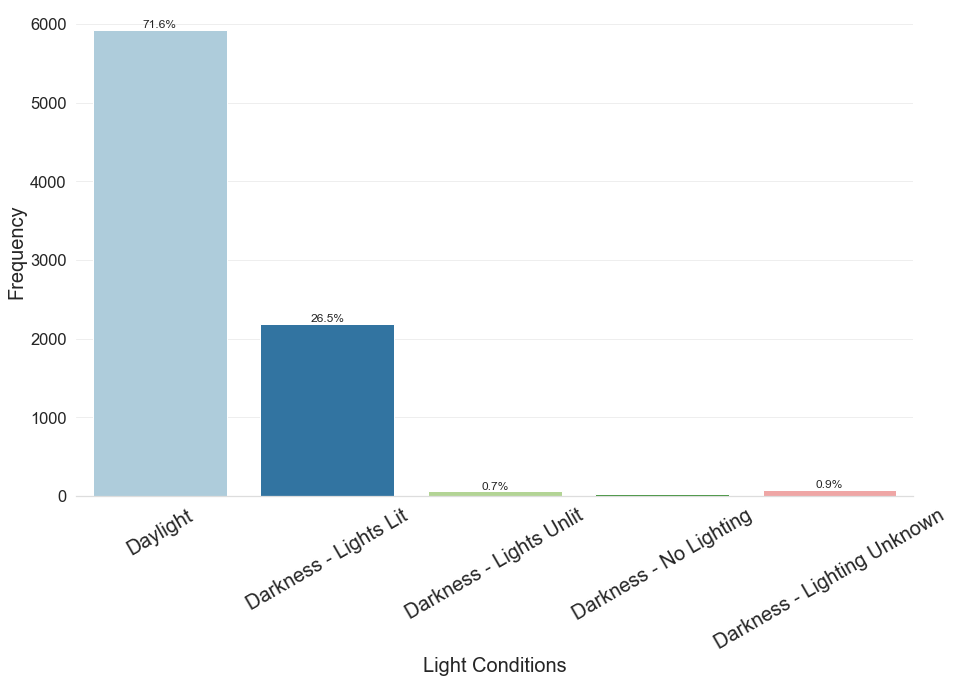

In [74]:

light_conditions_list = ['Daylight','Darkness - Lights Lit','Darkness - Lights Unlit','Darkness - No Lighting','Darkness - Lighting Unknown']

new_barchart(x_train,'light_conditions','Frequency','Light Conditions',light_conditions_list,30,perc=True)

- 71.6% of all accidents occur in Daylight with 5922 occurences.


- Next is 26.5% of accidents which occur in Darkness with Lights Lit. 0.7% of accidents happen in Darkness with Lights Unlit.


- This shows adverse lighting conditions have little effect on the frequency of accidents.

### 6.1.16 Descriptive statistics for Weather Conditions

In [75]:
x_train['weather_conditions'].value_counts()

1    6756
2     967
9     189
8     114
4     107
5      98
3      29
7      10
6       4
Name: weather_conditions, dtype: int64

In [76]:
pd.DataFrame(x_train.loc[:,'weather_conditions'].describe())

,weather_conditions
count,8274
unique,9
top,1
freq,6756


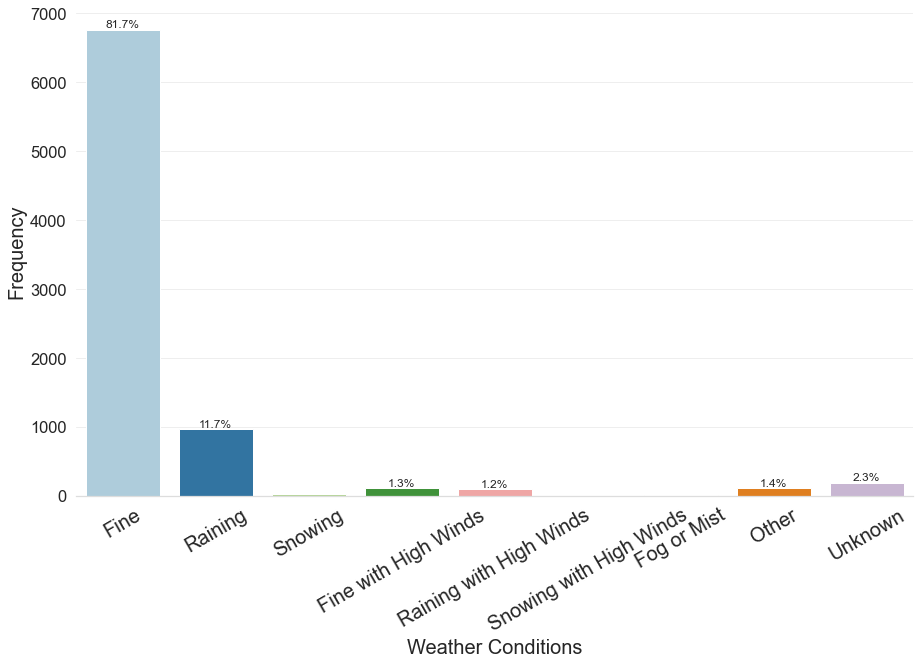

In [77]:
weather_conditions_list = ['Fine','Raining','Snowing','Fine with High Winds','Raining with High Winds','Snowing with High Winds','Fog or Mist','Other','Unknown']

new_barchart(x_train,'weather_conditions','Frequency','Weather Conditions',weather_conditions_list,30,perc=True)

- With 7656 occurences, 81.7% of all accidents occur when the weather is fine while 11.7% of all accidents happen when it's Raining.


- This shows adverse weather conditions have little to no effect on whether an accident occurs.

### 6.1.17 Descriptive statistics for Road Surface Conditions

In [78]:
x_train['road_surface_conditions'].value_counts()

1    6095
2    2041
4      79
3      27
9      27
5       5
Name: road_surface_conditions, dtype: int64

In [79]:
pd.DataFrame(x_train.loc[:,'road_surface_conditions'].describe())

,road_surface_conditions
count,8274
unique,6
top,1
freq,6095


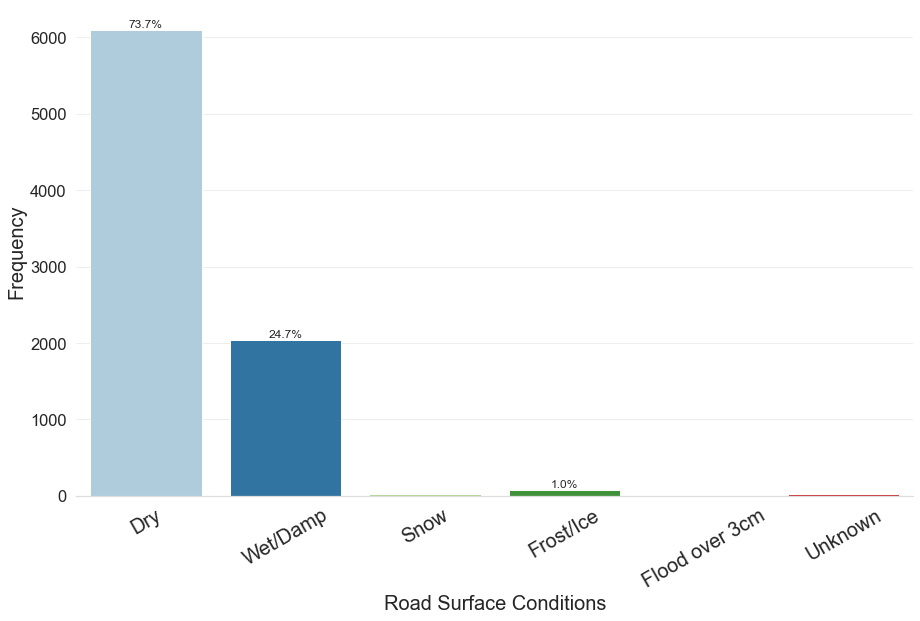

In [80]:
road_surface_conditions_list = ['Dry','Wet/Damp','Snow','Frost/Ice','Flood over 3cm','Unknown']

new_barchart(x_train,'road_surface_conditions','Frequency','Road Surface Conditions',road_surface_conditions_list,30,perc=True)

- 73.7% of accidents happen in Dry weather conditions with Wet/Damp conditions a distant second with 24.7%.


- The mode of this column is 'Dry' with 6095 occurences.

### 6.1.18 Descriptive statistics for Special Conditions at Site

In [81]:
x_train['special_conditions_at_site'].value_counts()

0    8039
4     121
1      22
5      22
3      21
6      16
9      16
2      11
7       6
Name: special_conditions_at_site, dtype: int64

In [82]:
pd.DataFrame(x_train.loc[:,'special_conditions_at_site'].describe())

,special_conditions_at_site
count,8274
unique,9
top,0
freq,8039


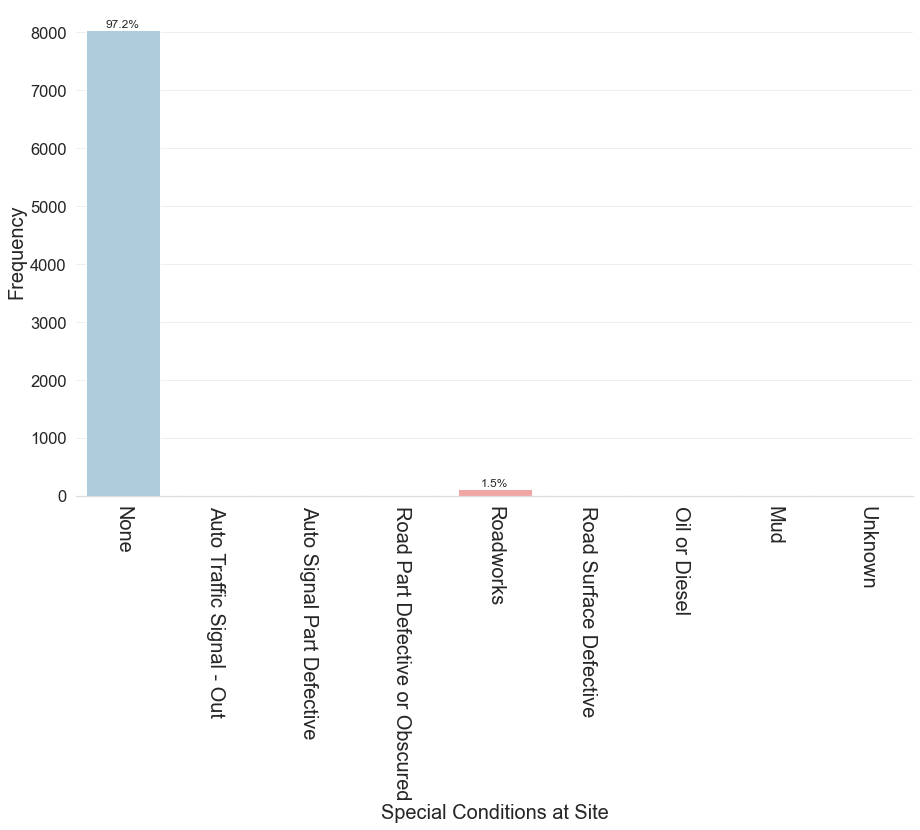

In [83]:
special_conditions_at_site_list = ['None','Auto Traffic Signal - Out','Auto Signal Part Defective','Road Part Defective or Obscured','Roadworks','Road Surface Defective','Oil or Diesel','Mud','Unknown']

new_barchart(x_train,'special_conditions_at_site','Frequency','Special Conditions at Site',special_conditions_at_site_list,270,perc=True)

- 97.2% of all accidents occur where there are no special conditions at site.


- This shows special conditions at site have little to no effect on where or whether an accident occurs.

### 6.1.19 Descriptive Statistics for Carriageway Hazards

In [84]:
x_train['carriageway_hazards'].value_counts()

0    8156
2      59
6      23
1      15
9      11
3       5
7       5
Name: carriageway_hazards, dtype: int64

In [85]:
pd.DataFrame(x_train.loc[:,'carriageway_hazards'].describe())

,carriageway_hazards
count,8274
unique,7
top,0
freq,8156


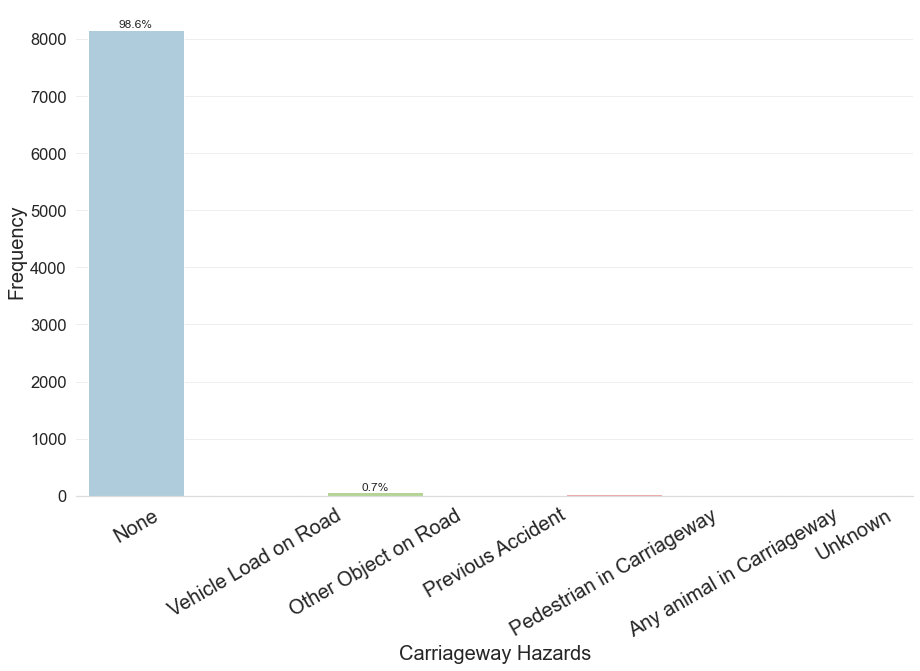

In [86]:
carriageway_hazards_list = ['None','Vehicle Load on Road','Other Object on Road','Previous Accident','Pedestrian in Carriageway','Any animal in Carriageway','Unknown']

new_barchart(x_train,'carriageway_hazards','Frequency','Carriageway Hazards',carriageway_hazards_list,30,perc=True)

- 98.6% of all accidents happen when there are no carriageway hazards.


- 0.7% of accidents happen due to the presence of another object on the road.


- The remaining carriageway hazards classes are negligible.

### 6.1.20 Descriptive statistics for Urban or Rural Area

In [87]:
x_train['urban_or_rural_area'].value_counts()

1    8156
2     117
3       1
Name: urban_or_rural_area, dtype: int64

In [88]:
pd.DataFrame(x_train.loc[:,'urban_or_rural_area'].describe())

,urban_or_rural_area
count,8274
unique,3
top,1
freq,8156


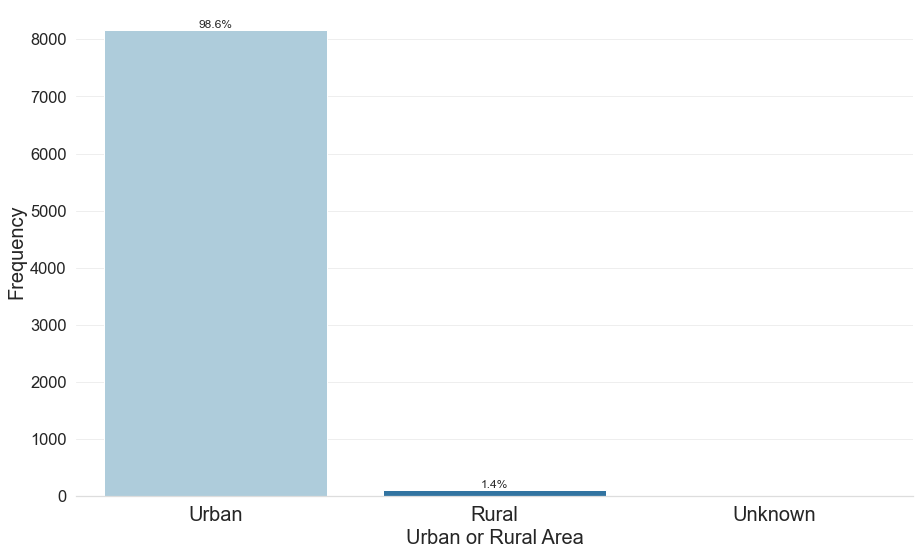

In [89]:
urban_or_rural_area_list = ['Urban','Rural','Unknown']

new_barchart(x_train,'urban_or_rural_area','Frequency','Urban or Rural Area',urban_or_rural_area_list,0,perc=True)

- 98.6% of accidents with 8156 occurences hapen in Urban areas while 1.4% happen in Rural areas.


- This mostly has to the with Liverpool being almost entirely an Urban Area.

### 6.1.21 Descriptive statistics for Police Office Attendance

In [90]:
x_train['did_police_officer_attend_scene_of_accident'].value_counts()

1    6093
2    2032
3     149
Name: did_police_officer_attend_scene_of_accident, dtype: int64

In [91]:
pd.DataFrame(x_train.loc[:,'did_police_officer_attend_scene_of_accident'].describe())

,did_police_officer_attend_scene_of_accident
count,8274
unique,3
top,1
freq,6093


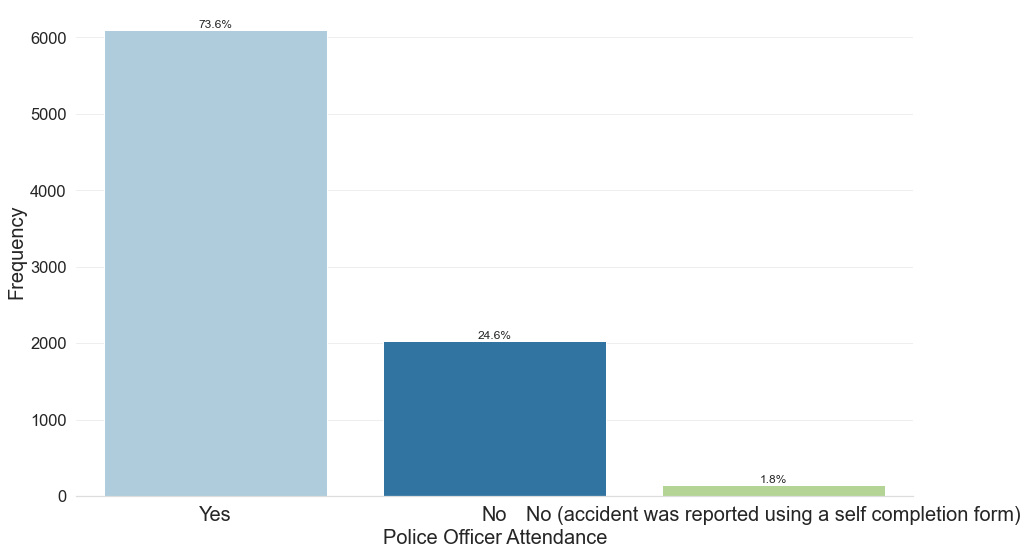

In [92]:
did_police_officer_attend_scene_of_accident_list = ['Yes','No','No (accident was reported using a self completion form)']

new_barchart(x_train,'did_police_officer_attend_scene_of_accident','Frequency','Police Officer Attendance',did_police_officer_attend_scene_of_accident_list,0,perc=True)

- 73.6% of all accidents were attended to by a Police officer with 24.6% no having Police Attendance.


- 1.8% of accidents have no Police Attendance and was reported using a self completion form.

## 7. Data Cleaning

In [93]:
"""
Dropping the status column from both training and testing datasets

"""

x_train = x_train.drop(['status'],axis=1)
x_test = x_test.drop(['status'],axis=1)

### 7.1 Checking for missing values

In [94]:
"""
Dropping the Longitude and Latitude Columns due to the large number of missing values

"""
x_train = x_train.drop(['longitude','latitude'], axis=1)
x_test = x_test.drop(['longitude','latitude'], axis=1)

In [95]:
x_train.isnull().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          1
location_northing_osgr                         1
police_force                                   0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail                                0
junction_control                               0
second_road_class   

In [96]:
x_test.isnull().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
police_force                                   0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail                                0
junction_control                               0
second_road_class   

In [97]:
"""
Dropping data with missing rows in x_train and x_test

"""

x_train.dropna(inplace=True)
x_test.dropna(inplace=True)



### 7.2 Dropping all Duplicate Occurences in the Dataset



In [98]:
x_train.drop_duplicates(inplace=True)
x_test.drop_duplicates(inplace=True)

In [99]:
"""
Checking the current count of missing values in the Dataset

"""

x_train.isnull().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
police_force                                   0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail                                0
junction_control                               0
second_road_class   

In [100]:
x_test.isnull().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
police_force                                   0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail                                0
junction_control                               0
second_road_class   

### 7.3 -1 is used to indicate missing values in the Dataset therefore counting the occurences of -1 in each column will give the number of missing values in the Dataset.

In [101]:
x_train.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'police_force',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'numeric_fraction',
       'Month'],
      dtype='object')

In [102]:
# create an empty dictionary to store the counts
counts_dict_train = {}
counts_dict_test = {}

#list of columns to be checked

cols_checked = ['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'police_force',
       'accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'date', 'day_of_week', 'time', 'local_authority_district',
       'local_authority_ons_district', 'local_authority_highway',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location']

# loop through the columns of the DataFrame
for col in cols_checked:
    
    try:
        # count the occurrence of the number -1 in the column
        counts_train = x_train[col].value_counts()[-1]
        counts_test = x_test[col].value_counts()[-1]
    
        # add the count to the dictionary with the column name as the key
        counts_dict_train[col] = counts_train
        counts_dict_test[col] = counts_test

        
    except KeyError:
        continue
    
# create a new DataFrame from the dictionary
counts_df_train = pd.DataFrame(counts_dict_train.items(), columns=['Column Name', 'Count'])

counts_df_test = pd.DataFrame(counts_dict_test.items(), columns=['Column Name', 'Count'])

# shows the counts DataFrame
counts_df_train


,Column Name,Count
0,accident_index,1
1,accident_reference,1
2,police_force,8273
3,date,1
4,time,1
5,local_authority_district,8273
6,local_authority_ons_district,1
7,local_authority_highway,1
8,first_road_class,12
9,first_road_number,1


In [103]:
counts_df_test

,Column Name,Count
0,accident_index,1
1,accident_reference,1
2,police_force,3546
3,date,1
4,time,1
5,local_authority_district,3546
6,local_authority_ons_district,1
7,local_authority_highway,1
8,first_road_class,6
9,first_road_number,1


### 7.4 Dropping columns with more than 2800 combined occurences of -1

In [104]:
x_train = x_train.drop(['junction_control','second_road_class','second_road_number'],axis=1)
x_test = x_test.drop(['junction_control','second_road_class','second_road_number'],axis=1)

In [105]:
print (x_train.shape)
print (x_test.shape)

(8273, 32)
(3546, 32)


### 7.5 Removing missing values in the dataset indicated by the "-1" value

In [106]:
# First, replacing -1 with Nan

x_train = x_train.replace(-1, np.nan)
x_test = x_test.replace(-1, np.nan)

# Then, dropping all missing values from the dataset

x_train.dropna(inplace=True)
x_test.dropna(inplace=True)

In [107]:
print (x_train.shape)
print (x_test.shape)

(8272, 32)
(3545, 32)


### 7.6 Dropping Unwanted Columns in both training and test dataset

- After performing descriptive analysis on the training dataset, columns which are deemed not useful in the predictive modeling process will then be dropped.

In [108]:
x_train.shape

(8272, 32)

In [109]:
x_test.shape

(3545, 32)

In [110]:
x_train = x_train.drop(['accident_index','accident_reference','location_easting_osgr','location_northing_osgr','date','time'
                            ,'local_authority_ons_district','local_authority_highway','trunk_road_flag',
                           'lsoa_of_accident_location','special_conditions_at_site','police_force',
                       'local_authority_district','first_road_number'],axis=1)

In [111]:
x_test = x_test.drop(['accident_index','accident_reference','location_easting_osgr','location_northing_osgr','date','time'
                            ,'local_authority_ons_district','local_authority_highway','trunk_road_flag',
                           'lsoa_of_accident_location','special_conditions_at_site','police_force',
                       'local_authority_district','first_road_number'],axis=1)

### Dropping corresponding rows of dropped x_train and x_test dataframe in y_train and y_test

In [112]:

# create a Boolean mask of the rows to keep using the indices of x_train and x_test

mask_train = y_train.index.isin(x_train.index.tolist())
mask_test = y_test.index.isin(x_test.index.tolist())

# filter the dataframe using the mask
y_train = y_train.loc[mask_train]
y_test = y_test.loc[mask_test]


# check shape of dataframes

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8272, 18)
(3545, 18)
(8272, 1)
(3545, 1)


In [113]:
x_train.head()

,accident_year,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,numeric_fraction,Month
7751693,2014,2,2,6,3,3,30.0,6,0,5,1,2,2,0,1,1,16.250000,1
7315071,2011,2,1,2,4,1,30.0,1,0,0,4,2,2,0,1,1,18.833333,12
8424567,2019,2,2,1,3,6,30.0,3,0,0,4,1,1,0,1,2,0.116667,9
8536985,2020,1,1,6,3,3,30.0,0,0,0,1,1,1,0,1,2,14.933333,10
8424042,2019,1,1,7,6,6,30.0,0,0,0,1,1,1,0,1,1,18.500000,6


In [114]:
x_test.head()

,accident_year,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,numeric_fraction,Month
7314480,2011,1,1,7,6,2,30.0,0,0,0,1,2,2,0,1,1,14.750000,2
7610112,2013,1,2,5,3,6,30.0,3,0,0,4,1,1,0,1,1,18.216667,11
8536948,2020,2,1,5,6,6,30.0,6,0,0,4,1,2,0,1,1,19.000000,10
7610515,2013,1,1,5,3,3,30.0,6,0,0,1,1,1,0,1,1,8.833333,12
8423258,2019,1,1,7,6,6,30.0,3,0,8,4,2,2,0,1,1,21.083333,1


In [115]:
y_train.head()

,accident_severity
7751693,3
7315071,3
8424567,3
8536985,3
8424042,3


In [116]:
y_test.head()

,accident_severity
7314480,2
7610112,1
8536948,3
7610515,3
8423258,2


We are not including the data preprocessing (scaling and normalisation) in the Group assignment because this should be done after
any feature engineering. We will all be engineering different features in the Individual assignment and therefore we will do the scaling
and normalisation after this.


## 8.0 Statistical Analysis

### 8.1 Statistical analysis to check if day of the week affects the number of accidents

In [117]:
from scipy.stats import chisquare

# Create a frequency table to summarize the frequency of the variable
frequency_table = x_train['day_of_week'].value_counts()

# Perform a chi-square test for goodness of fit on the frequency table
chi2, p = chisquare(frequency_table)

# Print the results of the chi-square test
print('Chi-Square Statistic:', chi2)
print('p-value:', p)

Chi-Square Statistic: 127.04206963249516
p-value: 5.390661454916015e-25


Since the p-value is less than 0.05, we can conclude that the observed frequency of the day an accident occurs is significantly different from what we would expect by chance.


This means accident frequency is dependent on day of the week.

### 8.2 Statistical analysis to check if Month affects the number of accidents

In [118]:
# Create a frequency table to summarize the frequency of the variable
frequency_table = x_train['Month'].value_counts()

# Perform a chi-square test for goodness of fit on the frequency table
chi2, p = chisquare(frequency_table)

# Print the results of the chi-square test
print('Chi-Square Statistic:', chi2)
print('p-value:', p)

Chi-Square Statistic: 57.468085106382986
p-value: 2.7278997729316177e-08


Since the p-value is less than 0.05, we can conclude that the observed frequency of the month an accident occurs is significantly different from what we would expect by chance.


This means accident frequency is dependent on day of the month.

## 9.0 Conclusion

After analysis, I have successfully created an accident dataframe for the Merseyside area in the United Kingdom . 


In the next separate notebook, I will be generating a predictive model which predicts the most dangerous zones in this area with regards to vehicular accidents and come up with preventive measures that can mitigate the loss of human lives and property damages.

## 10.0 Data Exporting

Creating and passing the transformed and split datasets to the model creation and predictive notebook by exporting them to csv files.

In [119]:
x_train.to_csv("x_train.csv")
y_train.to_csv("y_train.csv")
x_test.to_csv("x_test.csv")
y_test.to_csv("y_test.csv")

In [120]:
# Finish Timer

"---- The notebook is completed in %s minutes----"%((str(round((time.time() - Start_time)/60,4))))

'---- The notebook is completed in 0.9311 minutes----'